## 앙상블 학습

## 앙상블 학습 (Ensemble Learning) 개요

### 앙상블 학습을 통한 분류   

- 여러 개의 분류기(Classifier)을 사용해서 예측 결합함으로써 보다 정확한 최종 예측을 도출하는 기법
- 단일 분류기 사용 때보다 신뢰성이 높은 예측값을 얻을 수 있음
- 쉽고 편하면서도 강력한 성능 보유
- 대부분의 정형 데이터 분류 시 뛰어난 성능을 나타냄
- 이미지, 영상, 음성 등의 비정형 데이터 분류 : 딥러닝 성능 뛰어남

### 대표적인 앙상블 알고리즘
- 랜덤포레스트
- 그레디언트 부스팅

#### 최신 앙상블 알고리즘
- XGBoost 
- LightBGM : XGBoot 예측성능 유사하면서 수행속도 훨씬 빠름
- Stacking : 메타모델 수립

### 앙상블 학습결과(예측) 결합하는 방법

- 보팅(Voting)
- 배깅(Bagging)
- 부스팅(Boosting)

보팅(Voting) : 여러 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식
- 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합

배깅(Bagging) : 보팅과 동일하게 여러 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식
- 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만, 
- 샘플링을 서로 다르게 하면서 학습 수행
- 대표적인 배깅 방식 : 랜덤 포레스트 알고리즘

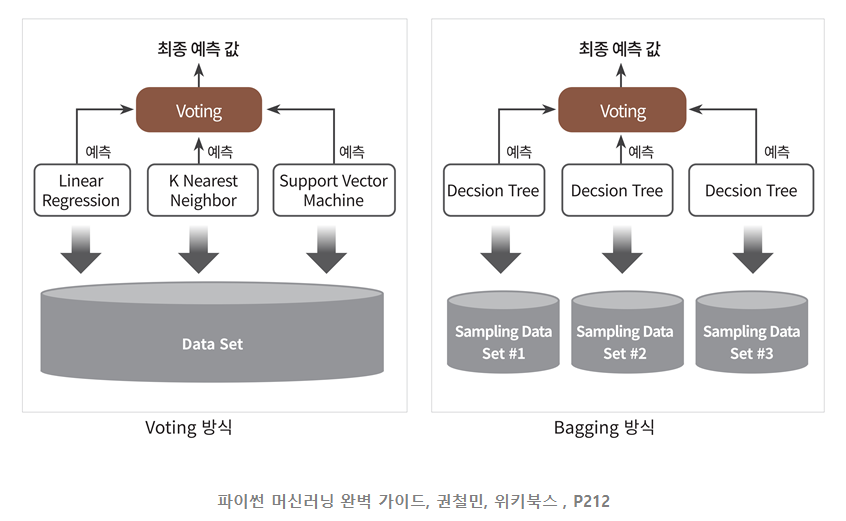

샘플링 방식 : 부트 스트래핑 분할 방식
- 개별 Classifier에게 데이터를 샘플링해서 추출하는 방식
- 각 샘플링된 데이터 내에는 중복 데이터 포함
- (교차 검증에서는 데이터 세트 간에 중복 허용하지 않음)

https://swalloow.github.io/bagging-boosting/

### 부스팅(Boosting)
- 여러 개의 분류기가 순차적으로 학습 수행하되
- 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록
- 다음 분류기에게는 가중치(weight)를 부여하면서 
- 학습과 예측을 진행하는 방식
- 예측 성능이 뛰어나 앙상블 학습 주도
- boost : 밀어 올림
    
**대표적인 부스팅 모듈**
- Gradient Boost
- XGBoost(eXtra Gradient Boost)
- LightGBM(Light Gradient Boost)

#### 보팅 유형
- 하드 보팅
- 소프트 보팅

#### 하드 보팅 (Hard Voting)
- 다수결 원칙과 유사
- 예측한 결과값들 중에서 
- 다수의 분류기가 결정한 예측값을
- 최종 보팅 결과값으로 선정

#### 소프트 보팅 (Soft Voting)
- 분류기들의 레이블 값 결정 확률을 평균내서
- 확률이 가장 높은 레이블 값을
- 최종 보팅 결과값으로 선정
- 일반적으로 소프트 보팅이 예측 성능이 좋아서 더 많이 사용

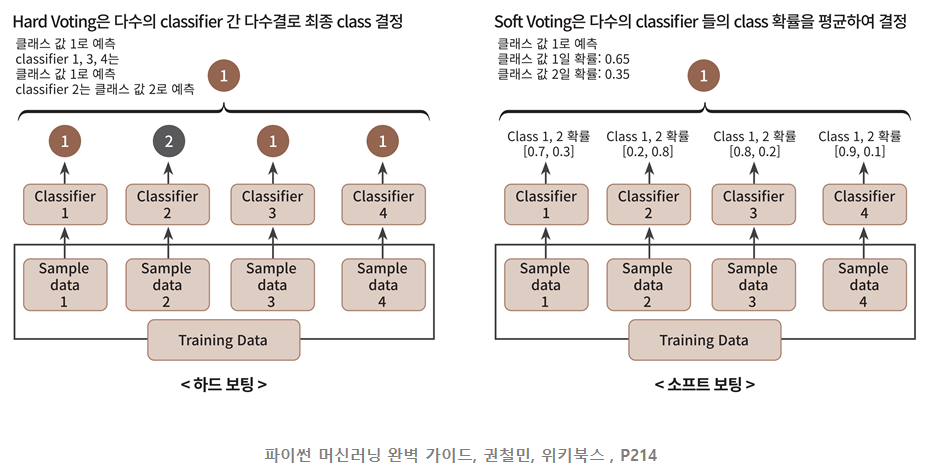

### Voting Classifier

### 보팅 방식의 앙상블 예제 : 위스콘신 유방암 데이터 세트 예측 분석  

**위스콘신 유방암 데이터 세트**  

- 유방암의 악성종양, 양성종양 여부를 결정하는 이진 분류 데이터 세트
- 종양의 크기, 모양 등의 형태와 관련한 많은 피처 포함
- 사이킷런의 보팅 양식의 앙상블을 구현한 VotingClassifier 클래스를 이용해서 보팅 분류기 생성  
- load_breast_cancer() 함수를 통해 위스콘신 유방암 데이터 세트 생성
- 로지스틱 회귀와 KNN 기반으로 소프트 보팅 방식으로 보팅 분류기 생성


### 데이터 준비

In [1]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- 개별 모델 : 로지스틱 회귀/ KNN   

**학습/예측/평가 후 성능 비교**

로지스틱 회귀
- 선형 회귀 방식을 분류에 적용한 알고리즘
- 선형 회귀 방식을 기반으로 하되
- 시그모이드 함수를 이용해 분류 수행

K- 최근접 이웃 알고리즘 (K-Nearest Neighbor) 
- 가장 직관적이고 간단
- 주변의 더 많은 데이터 범주로 분류하는 방식

In [3]:
# 1. 개별 모델 객체 인스턴스 생성  


VotingClassifier 클래스의 주요 생성 인자
- estimators : 리스트 값으로 보팅에 사용될 여러 개(list형식)의 Classifier 객체들을 튜플 형식으로 입력 받음
    - [('LR',lr_clf),('KNN',knn_clf)]
- voting : 보팅 방식 - hard/soft (디폴트 : hard) 

In [4]:
# 2. 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 인스턴스 생성


In [5]:
# 3. 학습 (데이터세트 분리) 
# 데이터 세트 분리
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                        test_size=0.2 , random_state= 156)


# 평가
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9561


In [6]:
# 로지스틱 회귀와 KNN 각 개별 모델로 학습/예측/평가


LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9386


#### 결론 : 보팅을 통해서 개별 모델들을 합치면 좋아질 수 있는 가능성이 있고, 모델 방향을 선택할 수 있음

## 배깅(Bagging) 학습 유형

- 대표적인 알고리즘 : 랜덤포레스트 알고리즘  

    - 모델로 결정트리 모델을 사용함
        - 결정트리 : 쉽고 직관적인 분류 기준을 갖고있음
            - 단점 : 데이터를 과학게 학습 - 과적합
    - 결정트리 수십개~ 수천개의 많은 분류기를 결합해 다양한 상황을 학습하게 해서 과적합의 단점을 극복하고 있음

### Random Forest  

- 앙상블 알고리즘 중 수행속도가 빠르다
- 다양한 영역에서 높은 예측성능을 보인다
- 기반 알고리즘 : 결정트리

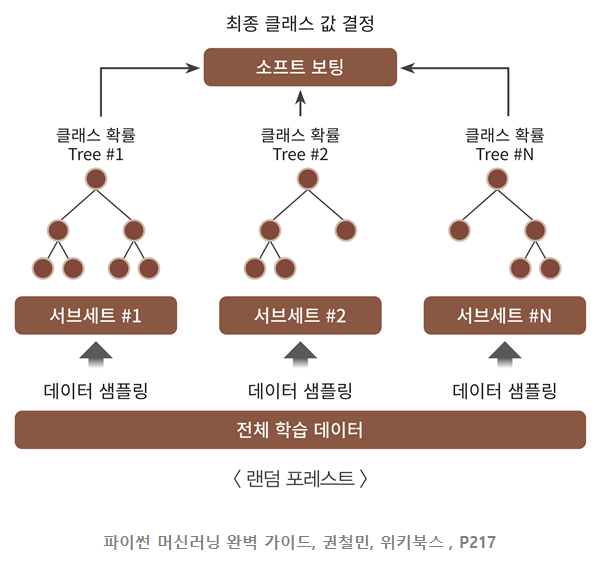

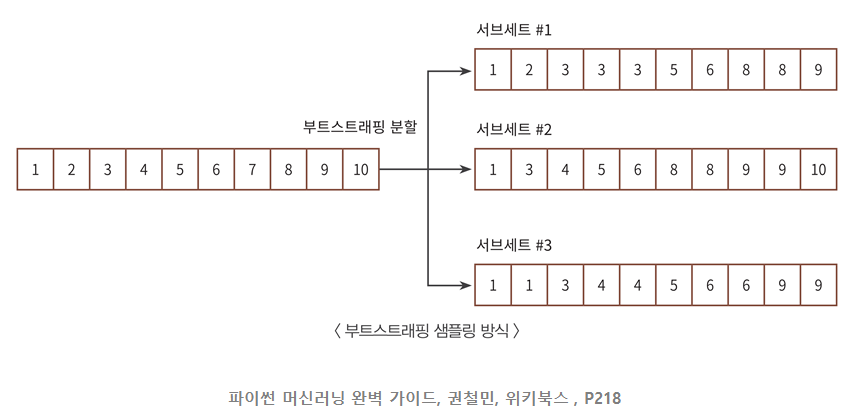

## 랜덤 포레스트 예제
- 앞의 사용자 행동 인식 데이터 세트를 
- 사이킷런의 RandomForestClassifier 클래스를 이용해 예측 수행

**결정 트리에서 사용한 사용자 행동 인지 데이터 세트 로딩**

In [12]:
X_train = pd.read_csv('./data/human_X_train.csv')
X_test = pd.read_csv('./data/human_X_test.csv')
y_train = pd.read_csv('./data/dy_train.txt',sep='\s+',header=None,names=['action'])
y_test = pd.read_csv('./data/y_test.txt',sep='\s+',header=None,names=['action'])

#### 랜덤포레스트 이용 학습/예측/평가

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [14]:

print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))


랜덤 포레스트 정확도: 0.9253


#### 결과 : 정확도는 향상 되었지만 수행속도가 좋은편이 아님

**GridSearchCV 로 교차검증 및 하이퍼 파라미터 튜닝**
- 앞의 사용자 행동 데이터 세트 그대로 사용
- 튜닝 시간을 절약하기 위해 
    - n_estimators=100
    - cv=2

n_estimators : 결정 트리의 개수. 디폴트 10
- 많이 설정할수록 좋은 성능을 기대할 수 있지만
- 계속 증가시킨다고 무조건 향샹되는 것은 아님
- 또 증가시킬수록 학습 수행 시간이 오래 걸림

In [15]:
from sklearn.model_selection import GridSearchCV

# 테스트해볼 데이터를 많이 넣으면 기하급수적으로 늘어난다


print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


#### 튜닝된 하이퍼파라미터로 재 학습/예측/평가 - 분류기 수를 확장

In [17]:

print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9196


### 개별 feature들의 중요도 시각화

- feature_importance_ 속성을 이용해서 피처중요를 알 수 있음

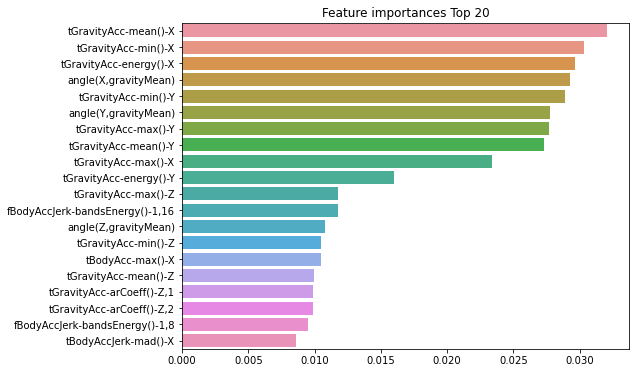

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

